In [ ]:
import glob
import os
import sys
from tkinter.tix import Tree
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.model_selection import train_test_split
from module.preprocessing import pre_sentences
from module.model import TextGenerator
from module.gen_sentence import generate_text

In [ ]:
#hyper parameters
img_show = True
embedding_size = 512
hidden_size = 2048
epoch = 10

In [3]:
local_path = os.getcwd()
txt_file_path = os.path.join(local_path, 'data', 'lyrics', '*')
txt_list = glob.glob(txt_file_path)
raw_corpus = []
for txt_file in txt_list:
    with open(txt_file, 'r', encoding='UTF-8') as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)
print("데이터 크기:", len(raw_corpus))

데이터 크기: 187088


In [4]:
tensor, tokenizer = pre_sentences(raw_corpus)
src_input = tensor[:, :-1]
tgt_input = tensor[:, 1:]
enc_train, enc_val, dec_train, dec_val = train_test_split(src_input, tgt_input, test_size=0.2, random_state=42)

In [5]:
model = TextGenerator(tokenizer.num_words + 1, embedding_size, hidden_size)

In [6]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')\
    , optimizer=tf.keras.optimizers.Adam())

early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=2, restore_best_weights=True)

In [7]:
hist = model.fit(enc_train, dec_train, epochs=epoch, validation_data=(enc_val, dec_val), callbacks=[early_stop])

Epoch 1/10
3901/3901 [==============================] - 435s 106ms/step - loss: 2.9098 - val_loss: 2.6044
Epoch 2/10
3901/3901 [==============================] - 423s 109ms/step - loss: 2.3390 - val_loss: 2.3474
Epoch 3/10
3901/3901 [==============================] - 424s 109ms/step - loss: 1.8857 - val_loss: 2.2153
Epoch 4/10
3901/3901 [==============================] - 425s 109ms/step - loss: 1.5433 - val_loss: 2.1791
Epoch 5/10
3901/3901 [==============================] - 424s 109ms/step - loss: 1.3178 - val_loss: 2.1966
Epoch 6/10
3901/3901 [==============================] - 424s 109ms/step - loss: 1.1864 - val_loss: 2.2400


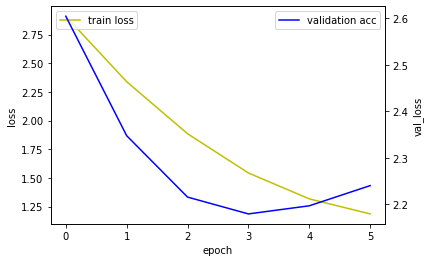

In [8]:
if img_show:
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    acc_ax.plot(hist.history['val_loss'], 'b', label='validation acc')
    acc_ax.set_ylabel('val_loss')
    acc_ax.legend(loc='upper right')
    plt.show()

In [11]:
while(True):
    sent = input()
    if sent == 'q':
        break
    print(generate_text(model, tokenizer, init_sentence=("<start>"+sent), max_len=20))

I love
<unk> love <end> 
q
